<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T2_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Title and Author Information**
**Goal:** The use of direct methods (one-dimensional and multidimensional) for solving unconstrained nonlinear optimization problems.


# **2. Problem Formulation**
In this task, we aim to minimize different functions using direct one-dimensional and multidimensional optimization methods such as exhaustive search, dichotomy, golden section, Gauss (coordinate descent), and Nelder-Mead methods.



# **3. Theoretical Part**

### 3.1 One-Dimensional Methods
Exhaustive Search: Divides the interval into subintervals and finds the minimum by evaluating the function at each point.
Dichotomy Method: Divides the interval into two halves and selects the subinterval where the function is smaller.
Golden Section Search: Uses the golden ratio to divide the interval and iteratively reduce the interval size.

### 3.2 Multidimensional Methods
Gauss (Coordinate Descent): Optimizes each coordinate one at a time.
Nelder-Mead: A simplex-based optimization method that does not require gradients.


# **4. Code Implementation and Results**
### 4.1 One-Dimensional Optimization Methods
We’ll implement the one-dimensional methods (exhaustive search, dichotomy, and golden section search) for three functions:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function 1: f(x) = x^2, x in [0, 1]
def f1(x):
    return x**2

# Function 2: f(x) = |x - 0.2|, x in [0, 1]
def f2(x):
    return abs(x - 0.2)

# Function 3: f(x) = x * sin(1/x), x in [0.01, 1]
def f3(x):
    return x * np.sin(1/x)


# 4.1.1 Exhaustive Search


In [6]:
def exhaustive_search(f, a, b, eps=0.001):
    x_min = a
    f_min = f(a)
    iterations = 0
    while a <= b:
        f_val = f(a)
        if f_val < f_min:
            f_min = f_val
            x_min = a
        a += eps
        iterations += 1
    return x_min, f_min, iterations


### 4.1.2 Dichotomy Method


In [7]:
def dichotomy_search(f, a, b, eps=0.001):
    iterations = 0
    while abs(b - a) > eps:
        midpoint = (a + b) / 2
        if f(midpoint - eps) < f(midpoint + eps):
            b = midpoint
        else:
            a = midpoint
        iterations += 1
    return (a + b) / 2, f((a + b) / 2), iterations


### 4.1.3 Golden Section Search


In [8]:
def golden_section_search(f, a, b, eps=0.001):
    golden_ratio = (1 + np.sqrt(5)) / 2
    iterations = 0
    while abs(b - a) > eps:
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio
        if f(c) < f(d):
            b = d
        else:
            a = c
        iterations += 1
    return (a + b) / 2, f((a + b) / 2), iterations


### 4.2 Results for One-Dimensional Methods
We can run the above methods for the three functions:

In [9]:
# Interval for each function
a, b = 0, 1
a_f3, b_f3 = 0.01, 1

# Run optimization methods for each function
result_exhaustive_f1 = exhaustive_search(f1, a, b)
result_dichotomy_f1 = dichotomy_search(f1, a, b)
result_golden_f1 = golden_section_search(f1, a, b)

result_exhaustive_f2 = exhaustive_search(f2, a, b)
result_dichotomy_f2 = dichotomy_search(f2, a, b)
result_golden_f2 = golden_section_search(f2, a, b)

result_exhaustive_f3 = exhaustive_search(f3, a_f3, b_f3)
result_dichotomy_f3 = dichotomy_search(f3, a_f3, b_f3)
result_golden_f3 = golden_section_search(f3, a_f3, b_f3)

# Print results
print("Function f1(x) = x^2")
print(f"Exhaustive: {result_exhaustive_f1}")
print(f"Dichotomy: {result_dichotomy_f1}")
print(f"Golden Section: {result_golden_f1}\n")

print("Function f2(x) = |x - 0.2|")
print(f"Exhaustive: {result_exhaustive_f2}")
print(f"Dichotomy: {result_dichotomy_f2}")
print(f"Golden Section: {result_golden_f2}\n")

print("Function f3(x) = x * sin(1/x)")
print(f"Exhaustive: {result_exhaustive_f3}")
print(f"Dichotomy: {result_dichotomy_f3}")
print(f"Golden Section: {result_golden_f3}\n")


Function f1(x) = x^2
Exhaustive: (0, 0, 1000)
Dichotomy: (0.00048828125, 2.384185791015625e-07, 10)
Golden Section: (0.0003665687179287022, 1.3437262496389247e-07, 15)

Function f2(x) = |x - 0.2|
Exhaustive: (0.20000000000000015, 1.3877787807814457e-16, 1000)
Dichotomy: (0.19970703125, 0.0002929687500000111, 10)
Golden Section: (0.20007331374358567, 7.331374358565679e-05, 15)

Function f3(x) = x * sin(1/x)
Exhaustive: (0.22300000000000017, -0.2172246125808345, 990)
Dichotomy: (0.22221191406250002, -0.2172286118926715, 10)
Golden Section: (0.22271959361960325, -0.21723232817753246, 15)



### 4.3 Data Approximation with Random Noise
### 4.3.1 Generate Noisy Data



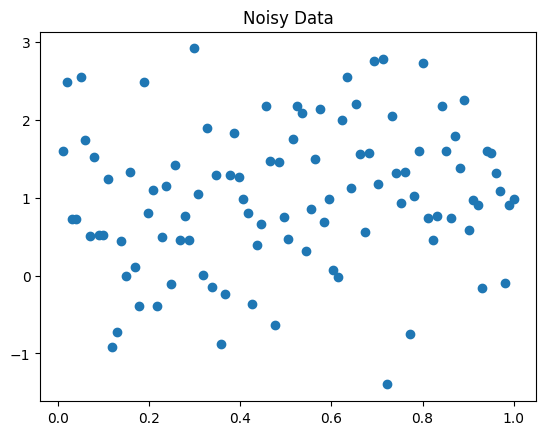

In [10]:
# Random coefficients alpha and beta
np.random.seed(42)
alpha, beta = np.random.rand(2)

# Generate noisy data
x_data = np.linspace(0.01, 1, 101)
y_data = alpha * x_data + beta + np.random.normal(0, 1, len(x_data))

plt.scatter(x_data, y_data, label="Noisy data")
plt.title("Noisy Data")
plt.show()


### 4.3.2 Linear and Rational Approximation




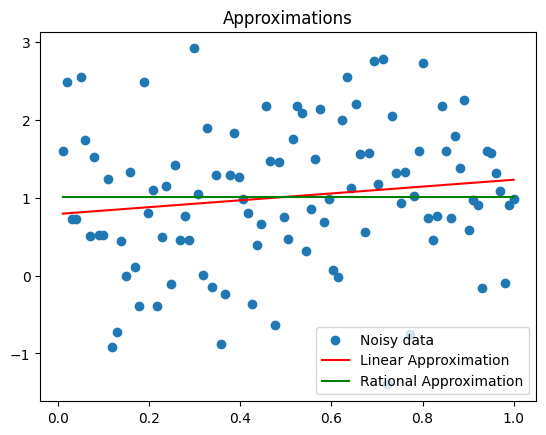

In [11]:
# Linear approximant
def linear_approx(x, a, b):
    return a * x + b

# Rational approximant
def rational_approx(x, a, b):
    return a / (x + b)

# Define error function for least squares
def error_function(approx, a, b, x_data, y_data):
    return np.sum((approx(x_data, a, b) - y_data) ** 2)

# Minimization using Nelder-Mead
from scipy.optimize import minimize

# Linear least squares fit
res_linear = minimize(lambda p: error_function(linear_approx, p[0], p[1], x_data, y_data), [1, 1], method='Nelder-Mead')
a_linear, b_linear = res_linear.x

# Rational least squares fit
res_rational = minimize(lambda p: error_function(rational_approx, p[0], p[1], x_data, y_data), [1, 1], method='Nelder-Mead')
a_rational, b_rational = res_rational.x

# Plot results
plt.scatter(x_data, y_data, label="Noisy data")
plt.plot(x_data, linear_approx(x_data, a_linear, b_linear), label="Linear Approximation", color="red")
plt.plot(x_data, rational_approx(x_data, a_rational, b_rational), label="Rational Approximation", color="green")
plt.title("Approximations")
plt.legend()
plt.show()


# 5. Discussion and Conclusions

One-Dimensional Methods: Golden section search tends to be more efficient than exhaustive and dichotomy methods due to fewer iterations and function evaluations.\
Data Approximation: Both linear and rational approximations fit the noisy data, but the rational model might provide a better fit for nonlinear data.
